In [1]:
%load_ext dotenv
%dotenv 
# always need to load the environment
import os
import sys
sys.path.append(os.getenv('SRC_DIR')) # add source directory - this is important, setup
from logger import get_logger # gets out logger ready and initiated
_logs = get_logger(__name__)

In [2]:
import dask.dataframe as dd #
import pandas as pd # this darker shade means we load but do not use it in the script
import numpy as np
import os
from glob import glob

c:\Users\Alexander\miniconda3\envs\dsi_participant\lib\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
C:\Users\Alexander\AppData\Local\Temp\ipykernel_35900\1500862777.py:1: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask DataFrame will use new implementation that
contains several improvements including a logical query planning.
The user-facing DataFrame API will remain unchanged.

The new implementation is already available and can be enabled by
installing the dask-expr library:

    $ pip install dask-expr

and turning the query planning option on:

    >>> import dask
    >>> dask.config.set({'dataframe.query-planning': True})
    >>> import dask.dataframe as dd

API documentation for the new implementation is available at
https://docs.dask.org/en/stable/dask-expr-api.html

Any feedba

In [7]:
ft_dir = os.getenv("FEATURES_DATA") # load the features data, where we stored the parquet data files
ft_glob = glob(ft_dir+'/*.parquet')
df = dd.read_parquet(ft_glob).compute().reset_index() # compute creates a dataframe for dask

In [ ]:
# why do this?
# because we are familiar with python and not dask
# try working with small sample in pandas, when it works
# blow it up and then run it in dask

In [5]:
ft_glob # our list of feature files - there should be 500 listed down here
# remember this goes back to our src data folder
# use ctrl / to set comment at beginning automatically

['../../05_src/data/features/stock_features.parquet\\part.0.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.1.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.10.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.100.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.101.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.102.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.103.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.104.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.105.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.106.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.107.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.108.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.109.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.11.parquet'

In [11]:
df.head()
# see the information we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2777702 entries, 0 to 2777701
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ticker           object        
 1   Date             datetime64[ns]
 2   Open             float64       
 3   High             float64       
 4   Low              float64       
 5   Close            float64       
 6   Adj Close        float64       
 7   Volume           int64         
 8   sector           object        
 9   subsector        object        
 10  year             int32         
 11  Close_lag_1      float64       
 12  returns          float64       
 13  positive_return  int32         
 14  target           float64       
dtypes: datetime64[ns](1), float64(8), int32(2), int64(1), object(3)
memory usage: 296.7+ MB


# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [12]:
df.sample(n = 5)
# simple sample
# keep running to get different lines every time

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
2252905,LIN,2018-03-06,153.059998,154.669998,151.770004,153.649994,138.482452,1470000,Materials,Industrial Gases,2018,152.740005,0.005958,1,1.0
1477783,AEP,2015-11-19,55.590000,56.520000,55.529999,56.320000,41.333645,3748900,Utilities,Electric Utilities,2015,55.410000,0.016423,1,1.0
67642,FAST,2009-05-19,8.502500,8.610000,8.347500,8.385000,5.682021,8167600,Industrials,Trading Companies & Distributors,2009,8.577500,-0.022442,0,0.0
1162607,LHX,2017-12-06,142.410004,143.220001,141.789993,142.520004,125.457756,428100,Industrials,Aerospace & Defense,2017,142.580002,-0.000421,0,1.0
115769,EA,2008-02-15,48.250000,48.990002,47.990002,48.720001,47.651833,2679800,Communication Services,Interactive Home Entertainment,2008,48.430000,0.005988,1,1.0


In [13]:
# select_tickers = df['ticker'].unique().tolist()[0:9]
select_tickers = ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']
select_tickers

['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']

In [14]:
idx = df['ticker'].isin(select_tickers)
idx.sum() #True is 1, 0 is false

55055

In [17]:
idx = df['ticker'].isin(select_tickers) # this gives us access to the ticker column
small_df = df[idx] # saves as a boolean modifier, True and False, selects from ticker list
simple_sample_dt = small_df.sample(frac = 0.1) # only want 10% of all observations, fraction
# simple_sample_dt.shape, small_df.shape 

In [19]:
print(small_df.shape)
print(simple_sample_dt.shape)

(55055, 15)
(5506, 15)


Look at the distribution of tickers.

<Axes: xlabel='ticker'>

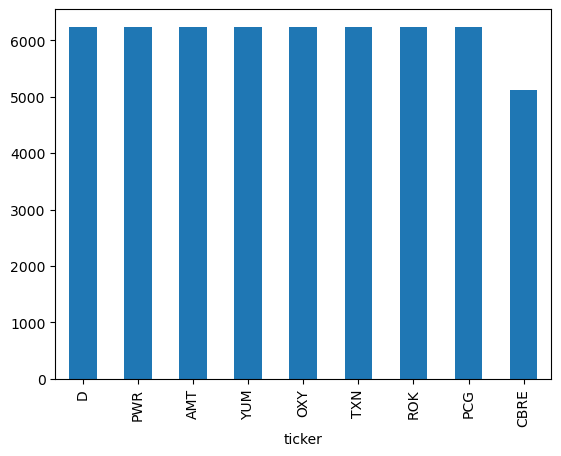

In [20]:
# number of instances per ticker
small_df['ticker'].value_counts().plot(kind='bar')
# count all values

<Axes: xlabel='ticker'>

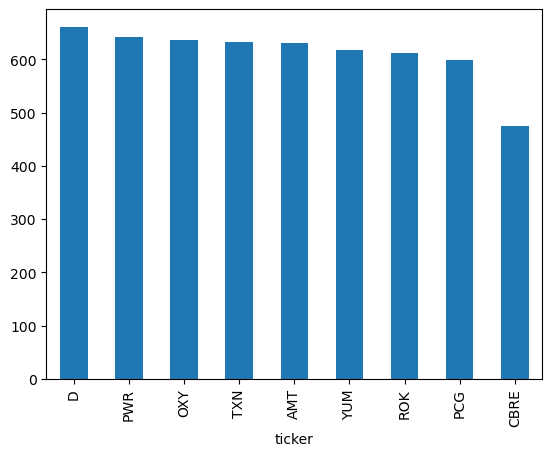

In [21]:
simple_sample_dt['ticker'].value_counts().plot(kind='bar')

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: xlabel='ticker'>

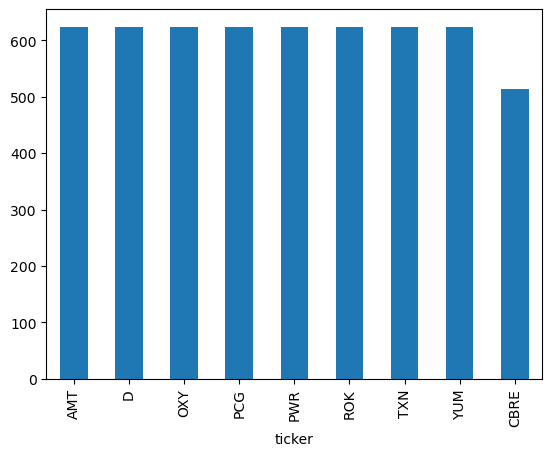

In [22]:
strat_sample_dt = small_df.groupby(['ticker']).sample(frac = 0.1)
strat_sample_dt['ticker'].value_counts().plot(kind='bar')

In [23]:
small_df.groupby(['ticker']).sample(frac=0.1)
# from each ticker we are going to sample 10% 

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
1651935,AMT,2014-06-19,88.010002,88.750000,87.699997,88.750000,70.606476,1455400,Real Estate,Telecom Tower REITs,2014,88.070000,0.007721,1,1.0
1653719,AMT,2021-07-21,282.679993,283.140015,279.929993,280.260010,255.244766,1167000,Real Estate,Telecom Tower REITs,2021,283.000000,-0.009682,0,1.0
1648656,AMT,2001-06-05,24.299999,24.860001,24.250000,24.510000,18.714914,653900,Real Estate,Telecom Tower REITs,2001,24.250000,0.010722,1,0.0
1652358,AMT,2016-02-24,87.570000,89.430000,87.010002,89.029999,72.766853,3775900,Real Estate,Telecom Tower REITs,2016,88.019997,0.011475,1,1.0
1649537,AMT,2004-12-08,17.959999,18.100000,17.650000,17.750000,13.553238,1975900,Real Estate,Telecom Tower REITs,2004,18.000000,-0.013889,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727255,YUM,2022-10-13,104.139999,110.599998,103.970001,109.680000,105.581398,1860200,Consumer Discretionary,Restaurants,2022,105.540001,0.039227,1,0.0
1727546,YUM,2023-12-11,124.540001,126.720001,124.410004,126.629997,124.760773,1182400,Consumer Discretionary,Restaurants,2023,124.339996,0.018417,1,1.0
1724073,YUM,2010-02-24,24.248741,24.306253,24.054638,24.234364,18.330683,3992448,Consumer Discretionary,Restaurants,2010,24.140905,0.003871,1,0.0
1725343,YUM,2015-03-12,55.398994,56.024445,55.168941,55.959740,46.789871,4022633,Consumer Discretionary,Restaurants,2015,54.996407,0.017516,1,0.0


# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

C:\Users\Alexander\AppData\Local\Temp\ipykernel_35900\2847013234.py:3: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  strat_sample_dd_dt = (dd_dt


<Axes: xlabel='ticker'>

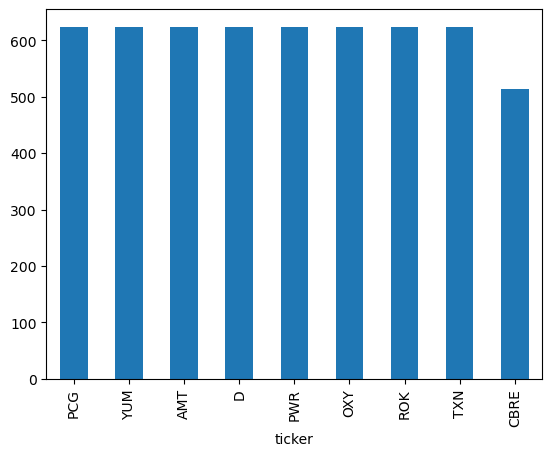

In [24]:
# same thing for processing in dask
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd_dt = (dd_dt
                      .groupby('ticker', group_keys=False) # group keys = false
                      .apply(lambda x: x.sample(frac = 0.1)) # this specified we will apply a function, x is gourped information for each ticker, take the 10% fraction of each ticker
                      .compute()
                      .reset_index()) # don't forget this part
strat_sample_dd_dt[strat_sample_dd_dt['ticker'].isin(select_tickers)]['ticker'].value_counts().plot(kind='bar') # convenience function

# basically stratified sampling 
# map reduce operation - lazy execution in dask
# basically chunking, reduce into parts, ie sample to make it smaller to compute